Accuracy: 0.28
Predictions saved as 'random_forest_predictions.csv'.
Classification report saved as 'random_forest_classification_report.csv'.
Confusion matrix saved as 'random_forest_confusion_matrix.csv'.
Feature importance saved as 'random_forest_feature_importance.csv'.


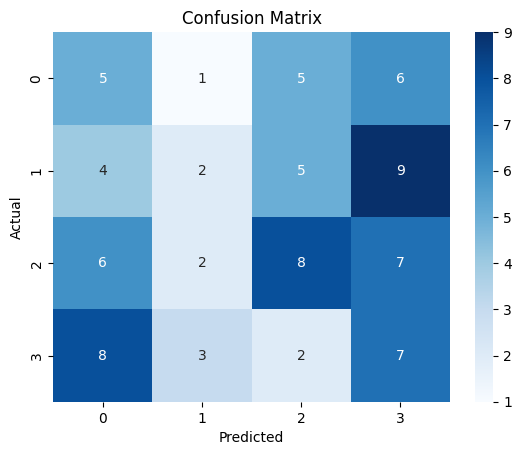

C:\Users\ASUS GK\AppData\Local\Temp\ipykernel_7536\720589920.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette= "magma")


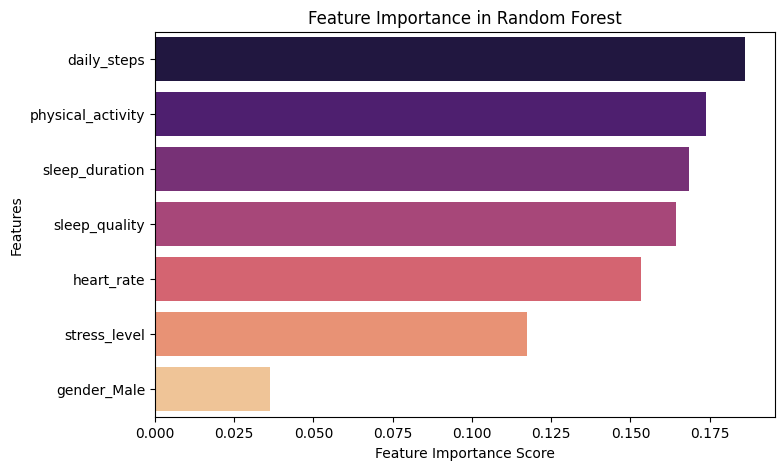

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("sleep_health_lifestyle_dataset.csv")

# Rename columns
df.columns = [
    "person_id",
    "gender",
    "age",
    "occupation",
    "sleep_duration",
    "sleep_quality",
    "physical_activity",
    "stress_level",
    "BMI_category",
    "blood_presure",
    "heart_rate",
    "daily_steps",
    "sleep_disorder"
]

# Handling missing values
df["sleep_disorder"] = df["sleep_disorder"].fillna("None")

# Selecting Features and Target
x = df[
    [
        "gender",
        "sleep_duration",
        "sleep_quality",
        "physical_activity",
        "stress_level",
        "heart_rate",
        "daily_steps",
    ]
]

y = df["BMI_category"]

# Convert categorical variables to numeric
x = pd.get_dummies(x, drop_first=True)  

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Model Prediction
y_pred = rf_model.predict(x_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Accuracy
print(f"Accuracy: {accuracy:.2f}")

# Save Predictions to CSV
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions_df.to_csv("random_forest_predictions.csv", index=False)
print("Predictions saved as 'random_forest_predictions.csv'.")

# Save Classification Report to CSV
classification_df = pd.DataFrame(classification_rep).transpose()
classification_df.to_csv("random_forest_classification_report.csv")
print("Classification report saved as 'random_forest_classification_report.csv'.")

# Save Confusion Matrix to CSV
conf_matrix_df = pd.DataFrame(conf_matrix, index=rf_model.classes_, columns=rf_model.classes_)
conf_matrix_df.to_csv("random_forest_confusion_matrix.csv")
print("Confusion matrix saved as 'random_forest_confusion_matrix.csv'.")

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False)

# Save Feature Importance to CSV
feature_importance_df = feature_importance.to_frame(name="Importance")
feature_importance_df.to_csv("random_forest_feature_importance.csv")
print("Feature importance saved as 'random_forest_feature_importance.csv'.")

# Visualization - Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualization - Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette= "magma")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()
